# Credit Performance Decision Support System
Authod: Ya Liu

In [1]:
import pandas
import numpy as np
# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [2]:
df = pandas.read_csv("heloc_dataset_v1.csv")
df = df.drop(df.loc[df.loc[:, df.columns != 'RiskPerformance'].apply(lambda row: all(value in [-7,-8,-9] for value in row), axis=1)].index)
df["RiskPerformance"].value_counts()

Bad     5136
Good    4735
Name: RiskPerformance, dtype: int64

In [3]:
print(df["MaxDelq2PublicRecLast12M"].value_counts())
df = df.drop(df[df.MaxDelq2PublicRecLast12M == 9].index)

7    4223
6    3127
4    1612
0     336
5     236
3     224
1      54
2      53
9       6
Name: MaxDelq2PublicRecLast12M, dtype: int64


In [4]:
df["MaxDelqEver"].value_counts()

8    4526
6    2868
5     968
2     739
4     321
3     311
7     132
Name: MaxDelqEver, dtype: int64

In [5]:
print(df["ExternalRiskEstimate"].value_counts().sort_index())
df["ExternalRiskEstimate"].median()
df["ExternalRiskEstimate"].replace([-9],df["ExternalRiskEstimate"].median(), inplace=True)
print(df["ExternalRiskEstimate"].value_counts().sort_index())

-9       6
 33      1
 34      1
 36      2
 37      1
      ... 
 90    100
 91    103
 92     34
 93     15
 94      1
Name: ExternalRiskEstimate, Length: 61, dtype: int64
33      1
34      1
36      2
37      1
39      1
40      2
41      1
42      2
43      5
44      4
45      3
46      1
47      6
48      4
49      5
50     15
51     10
52     13
53      3
54     97
55    129
56    187
57    188
58    175
59    225
60    232
61    281
62    246
63    338
64    295
65    386
66    376
67    276
68    372
69    316
70    350
71    275
72    373
73    369
74    276
75    331
76    260
77    288
78    247
79    286
80    301
81    256
82    263
83    227
84    282
85    223
86    254
87    190
88    201
89    161
90    100
91    103
92     34
93     15
94      1
Name: ExternalRiskEstimate, dtype: int64


In [6]:
print(df["MSinceOldestTradeOpen"].value_counts().sort_index())
print(df["MSinceOldestTradeOpen"].median())
df["MSinceOldestTradeOpen"].replace([-8],df["MSinceOldestTradeOpen"].median(), inplace=True)
df["MSinceOldestTradeOpen"].value_counts().sort_index()

-8      239
 2        1
 4        1
 5        1
 6        3
       ... 
 598      1
 603      1
 604      1
 789      1
 803      1
Name: MSinceOldestTradeOpen, Length: 525, dtype: int64
183.0


2      1
4      1
5      1
6      3
7      3
      ..
598    1
603    1
604    1
789    1
803    1
Name: MSinceOldestTradeOpen, Length: 524, dtype: int64

In [7]:
print(df["MSinceMostRecentTradeOpen"].value_counts().sort_index())
df=df.drop("MSinceMostRecentTradeOpen", 1)

0       105
1       732
2      1161
3      1015
4       885
       ... 
178       1
184       1
207       1
227       1
383       1
Name: MSinceMostRecentTradeOpen, Length: 109, dtype: int64


In [8]:
print(df["AverageMInFile"].value_counts().sort_index())

4       4
5       6
6       4
7       9
8      12
       ..
263     1
273     1
275     1
322     1
383     1
Name: AverageMInFile, Length: 236, dtype: int64


In [9]:
print(df["NumSatisfactoryTrades"].value_counts().sort_index())

0       4
1      47
2      90
3     101
4     138
     ... 
70      2
74      2
75      1
78      1
79      1
Name: NumSatisfactoryTrades, Length: 73, dtype: int64


In [10]:
print(df["NumTrades60Ever2DerogPubRec"].value_counts().sort_index())
df=df.drop("NumTrades60Ever2DerogPubRec", 1)

0     6797
1     1801
2      692
3      246
4      148
5       73
6       37
7       30
8       11
9        8
10       8
11       4
12       3
13       2
14       2
16       1
17       1
19       1
Name: NumTrades60Ever2DerogPubRec, dtype: int64


In [11]:
print(df["NumTrades90Ever2DerogPubRec"].value_counts().sort_index())
df=df.drop("NumTrades90Ever2DerogPubRec", 1)

0     7634
1     1435
2      488
3      129
4       83
5       38
6       18
7       16
8        3
9        8
10       5
11       2
12       2
14       1
16       2
19       1
Name: NumTrades90Ever2DerogPubRec, dtype: int64


In [12]:
print(df["PercentTradesNeverDelq"].value_counts().sort_index())

0         6
11        1
20        4
22        1
25        6
       ... 
96      414
97      389
98      173
99        6
100    4601
Name: PercentTradesNeverDelq, Length: 71, dtype: int64


In [13]:
print(df["MSinceMostRecentDelq"].value_counts().sort_index())
print(df["MSinceMostRecentDelq"].quantile([.8, .9]))
df["MSinceMostRecentDelq"].replace([-8],-51, inplace=True)
df["MSinceMostRecentDelq"].replace([-7],-80, inplace=True)
df["MSinceMostRecentDelq"].value_counts().sort_index()
df=df.drop("MSinceMostRecentDelq", 1)

-8      176
-7     4658
 0      102
 1      307
 2      294
       ... 
 79      19
 80      15
 81      14
 82       1
 83       1
Name: MSinceMostRecentDelq, Length: 86, dtype: int64
0.8    21.0
0.9    40.0
Name: MSinceMostRecentDelq, dtype: float64


In [14]:
print(df["MaxDelq2PublicRecLast12M"].value_counts().sort_index())

0     336
1      54
2      53
3     224
4    1612
5     236
6    3127
7    4223
Name: MaxDelq2PublicRecLast12M, dtype: int64


In [15]:
print(df["NumTotalTrades"].value_counts().sort_index())

0      133
1       44
2       75
3      113
4      119
      ... 
85       1
86       1
87       1
100      1
104      1
Name: NumTotalTrades, Length: 87, dtype: int64


In [16]:
print(df["NumTradesOpeninLast12M"].value_counts().sort_index())

0     2503
1     2528
2     1969
3     1302
4      743
5      365
6      229
7      108
8       56
9       25
10      18
11       8
12       4
13       2
14       2
16       1
17       1
19       1
Name: NumTradesOpeninLast12M, dtype: int64


In [17]:
print(df["PercentInstallTrades"].value_counts().sort_index())

0      193
2        1
3       12
4       29
5       31
      ... 
91       3
92       2
93       1
94       1
100     74
Name: PercentInstallTrades, Length: 95, dtype: int64


In [18]:
print(df["MSinceMostRecentInqexcl7days"].value_counts().sort_index())
print(df.loc[df["MSinceMostRecentInqexcl7days"] >=0,"MSinceMostRecentInqexcl7days"].quantile([.8, .9]))
df["MSinceMostRecentInqexcl7days"].replace([-8],23, inplace=True)

-8      476
-7     1853
 0     4578
 1      614
 2      378
 3      309
 4      268
 5      191
 6      150
 7      139
 8      112
 9       99
 10      93
 11      71
 12      61
 13      55
 14      65
 15      45
 16      49
 17      42
 18      34
 19      45
 20      31
 21      32
 22      35
 23      32
 24       8
Name: MSinceMostRecentInqexcl7days, dtype: int64
0.8    4.0
0.9    9.0
Name: MSinceMostRecentInqexcl7days, dtype: float64


In [19]:
print(df["NumInqLast6M"].value_counts().sort_index())

0     3920
1     2545
2     1509
3      761
4      489
5      242
6      140
7       81
8       61
9       32
10      26
11      19
12      10
13       7
14       4
15       1
16       4
17       3
18       1
19       3
20       1
21       1
24       2
29       1
46       1
66       1
Name: NumInqLast6M, dtype: int64


In [20]:
print(df["NumInqLast6Mexcl7days"].value_counts().sort_index())
df = df.drop("NumInqLast6Mexcl7days", 1)

0     4074
1     2529
2     1449
3      759
4      453
5      232
6      132
7       71
8       59
9       28
10      24
11      17
12      10
13       6
14       4
15       2
16       4
17       1
18       2
19       2
20       1
21       1
24       2
29       1
46       1
66       1
Name: NumInqLast6Mexcl7days, dtype: int64


In [21]:
print(df["NetFractionRevolvingBurden"].value_counts().sort_index())
print(df["NetFractionRevolvingBurden"].quantile([.8, .9]))
df["NetFractionRevolvingBurden"].replace([-8],62, inplace=True)

-8      182
 0      607
 1      303
 2      274
 3      259
       ... 
 131      1
 135      1
 154      1
 165      1
 232      1
Name: NetFractionRevolvingBurden, Length: 127, dtype: int64
0.8    62.0
0.9    78.0
Name: NetFractionRevolvingBurden, dtype: float64


In [22]:
print(df["NetFractionInstallBurden"].value_counts().sort_index())
print(df.loc[df["NetFractionInstallBurden"] >=0,"NetFractionInstallBurden"].quantile([.1, .5]))
df["NetFractionInstallBurden"].replace([-8],32, inplace=True)

-8      3414
 0        10
 1         4
 2        15
 3        21
        ... 
 153       1
 165       1
 190       1
 196       1
 471       1
Name: NetFractionInstallBurden, Length: 138, dtype: int64
0.1    32.0
0.5    74.0
Name: NetFractionInstallBurden, dtype: float64


In [23]:
print(df["NumRevolvingTradesWBalance"].value_counts().sort_index())
df["NumRevolvingTradesWBalance"].replace([-8],20, inplace=True)

-8      152
 0      303
 1     1330
 2     1708
 3     1608
 4     1361
 5     1010
 6      744
 7      507
 8      350
 9      242
 10     174
 11     114
 12      75
 13      52
 14      40
 15      27
 16      23
 17      16
 18       7
 19       4
 20       4
 21       5
 23       1
 24       3
 25       1
 26       1
 27       1
 29       1
 32       1
Name: NumRevolvingTradesWBalance, dtype: int64


In [24]:
print(df["NumInstallTradesWBalance"].value_counts().sort_index())

-8      856
 1     2647
 2     2863
 3     1809
 4      922
 5      352
 6      186
 7       86
 8       49
 9       36
 10      18
 11      15
 12      10
 13       5
 14       6
 15       1
 16       1
 19       2
 23       1
Name: NumInstallTradesWBalance, dtype: int64


In [25]:
print(df["NumBank2NatlTradesWHighUtilization"].value_counts().sort_index())
print(df.loc[df["NumBank2NatlTradesWHighUtilization"] >=0,"NumBank2NatlTradesWHighUtilization"].mean())
df["NumBank2NatlTradesWHighUtilization"].replace([-8],2, inplace=True)

-8      578
 0     4307
 1     2514
 2     1222
 3      620
 4      280
 5      154
 6       81
 7       38
 8       30
 9       11
 10      10
 11      10
 12       4
 13       3
 15       1
 16       1
 18       1
Name: NumBank2NatlTradesWHighUtilization, dtype: int64
1.0923872079250565


In [26]:
print(df["PercentTradesWBalance"].value_counts().sort_index())
df["PercentTradesWBalance"].replace([-8],90, inplace=True)

-8        14
 0        44
 4         1
 6         1
 7         1
        ... 
 93       37
 94       28
 95       13
 96        3
 100    1277
Name: PercentTradesWBalance, Length: 94, dtype: int64


### split X and Y

In [27]:
y = df["RiskPerformance"].map({"Good":0, "Bad":1})
X = df.drop("RiskPerformance", axis=1)

In [28]:
X.dtypes

ExternalRiskEstimate                  int64
MSinceOldestTradeOpen                 int64
AverageMInFile                        int64
NumSatisfactoryTrades                 int64
PercentTradesNeverDelq                int64
MaxDelq2PublicRecLast12M              int64
MaxDelqEver                           int64
NumTotalTrades                        int64
NumTradesOpeninLast12M                int64
PercentInstallTrades                  int64
MSinceMostRecentInqexcl7days          int64
NumInqLast6M                          int64
NetFractionRevolvingBurden            int64
NetFractionInstallBurden              int64
NumRevolvingTradesWBalance            int64
NumInstallTradesWBalance              int64
NumBank2NatlTradesWHighUtilization    int64
PercentTradesWBalance                 int64
dtype: object

## training

In [29]:
lr_model = Pipeline([("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

In [48]:
#X_train.to_csv("X_train.csv",index=False)
#y_train.to_csv("y_train.csv",index=False)
#df.to_csv("df.csv",index=False)

In [31]:
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1, param_grid={'model__C': [1, 1.3, 1.5]},
             scoring='accuracy')

In [32]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.5}
0.7371469949312093


In [33]:
lr_model.set_params(**gs.best_params_)

Pipeline(steps=[('model',
                 LogisticRegression(C=1.5, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [34]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('model',
   LogisticRegression(C=1.5, class_weight='balanced', random_state=42,
                      solver='liblinear'))],
 'verbose': False,
 'model': LogisticRegression(C=1.5, class_weight='balanced', random_state=42,
                    solver='liblinear'),
 'model__C': 1.5,
 'model__class_weight': 'balanced',
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'liblinear',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [35]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('model',
                 LogisticRegression(C=1.5, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [36]:
y_pred = lr_model.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.7361486486486486

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1420
           1       0.75      0.74      0.75      1540

    accuracy                           0.74      2960
   macro avg       0.74      0.74      0.74      2960
weighted avg       0.74      0.74      0.74      2960



In [39]:
import eli5
eli5.show_weights(lr_model.named_steps["model"], feature_names=list(X.columns),top=100)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight?,Feature
+5.414,<BIAS>
+0.125,NumBank2NatlTradesWHighUtilization
+0.069,NumInqLast6M
+0.036,NumRevolvingTradesWBalance
+0.017,NumTradesOpeninLast12M
+0.011,PercentInstallTrades
+0.011,NetFractionRevolvingBurden
+0.001,NetFractionInstallBurden
-0.000,MSinceOldestTradeOpen
-0.001,NumTotalTrades


In [47]:
eli5.show_prediction(lr_model.named_steps["model"], X_test.iloc[0],feature_names=list(X_test.columns), show_feature_values=True)

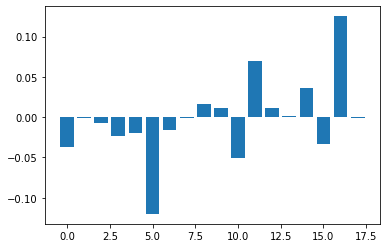

In [40]:

pyplot.bar([x for x in range(len(lr_model.named_steps["model"].coef_[0]))], lr_model.named_steps["model"].coef_[0])
pyplot.show()

In [41]:
dt_model = Pipeline([
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])
gs = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
dt_model.set_params(**gs.best_params_)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

{'model__max_depth': 3, 'model__min_samples_split': 2}
0.7141202027516294
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1420
           1       0.74      0.71      0.72      1540

    accuracy                           0.72      2960
   macro avg       0.72      0.72      0.72      2960
weighted avg       0.72      0.72      0.72      2960

